In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [216]:
df = pd.read_csv('dataset_model.csv')
pd.set_option('display.max_row', df.shape[0]+1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [46]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
a_Gender               int64
dtype: object

In [4]:
df.shape

(614, 13)

**1. Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe**

In [199]:
uni = []
for i in list(df.columns):
  if len(df[i].unique()) == df.shape[0]:
    uni.append(i)
    print(i)
df = df.drop(columns=uni[0])

Loan_ID


####**2. Identifying Continous & Categorical Columns**


**Continous Columns**

In [24]:
num_data = df._get_numeric_data().columns
cont_data = []
for i in num_data:
  if len(df[i].unique()) > df.shape[0]/10:
    cont_data.append(i)
    print(i + '\t' + str(len(df[i].unique())))

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
ApplicantIncome	505
CoapplicantIncome	287
LoanAmount	204


**Categorical Columns**

In [7]:
cat_data = []
for i in list(set(df.columns) - set(cont_data) - set(uni)):
  cat_data.append(i)
  print(i)

Loan_Amount_Term
Self_Employed
Property_Area
Education
Gender
Dependents
Loan_Status
Credit_History
Married


####**3. Performing Uni-variate Analysis with Plots.Record your Observations**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14ee955da0>,
      dtype=object)

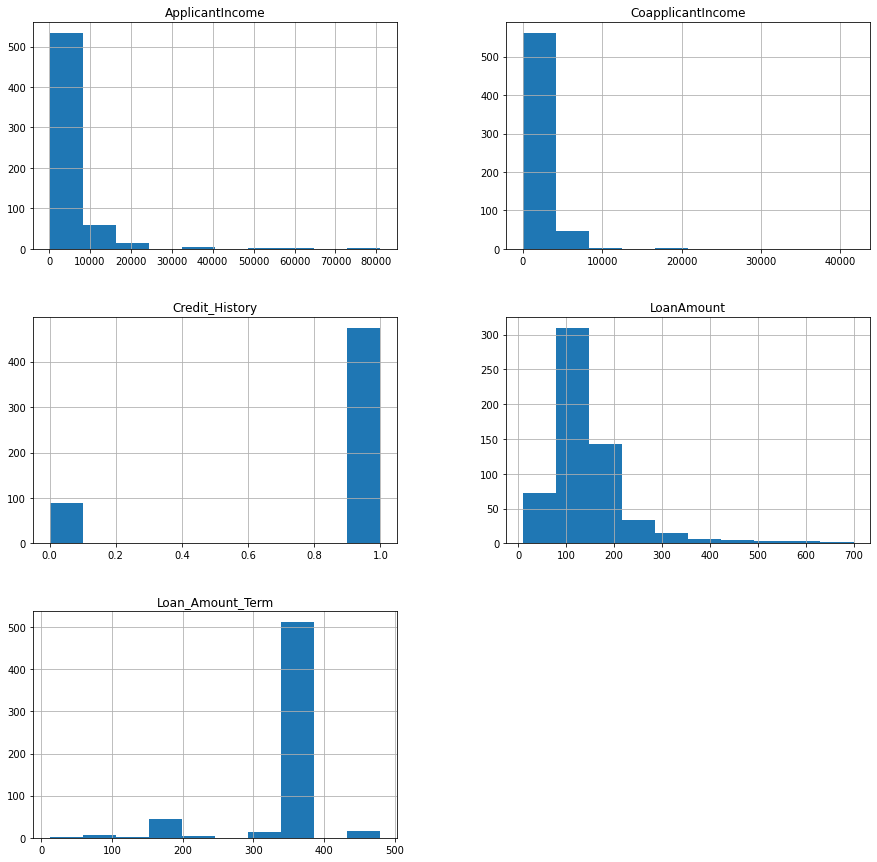

In [8]:
df.hist(figsize=[15,15])

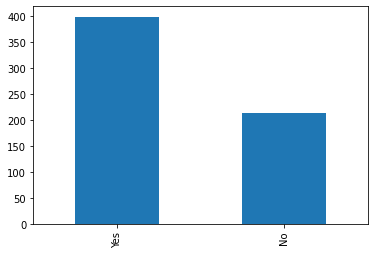

In [9]:
df['Married'].value_counts().plot.bar()

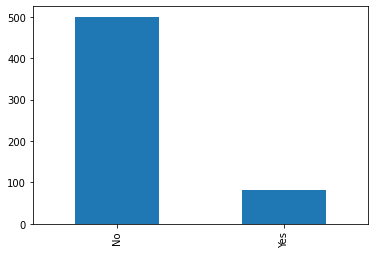

In [10]:
df['Self_Employed'].value_counts().plot.bar()

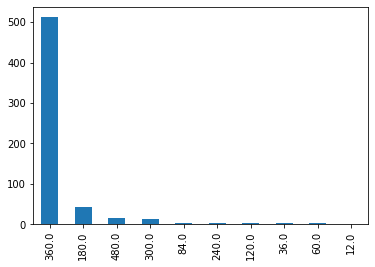

In [11]:
df['Loan_Amount_Term'].value_counts().plot.bar()

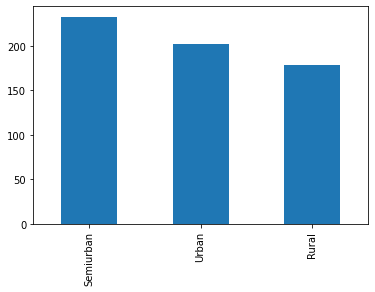

In [12]:
cat_data
df['Property_Area'].value_counts().plot.bar()

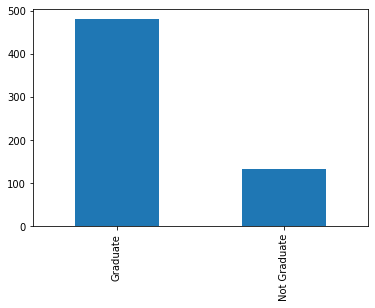

In [13]:
df['Education'].value_counts().plot.bar()


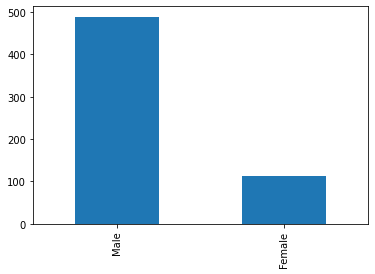

In [14]:
df['Gender'].value_counts().plot.bar()


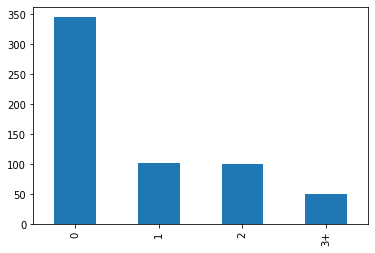

In [15]:
df['Dependents'].value_counts().plot.bar()


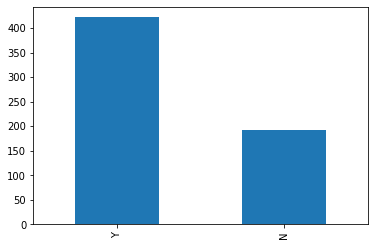

In [16]:
df['Loan_Status'].value_counts().plot.bar()

####**4. Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations** **bold text**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


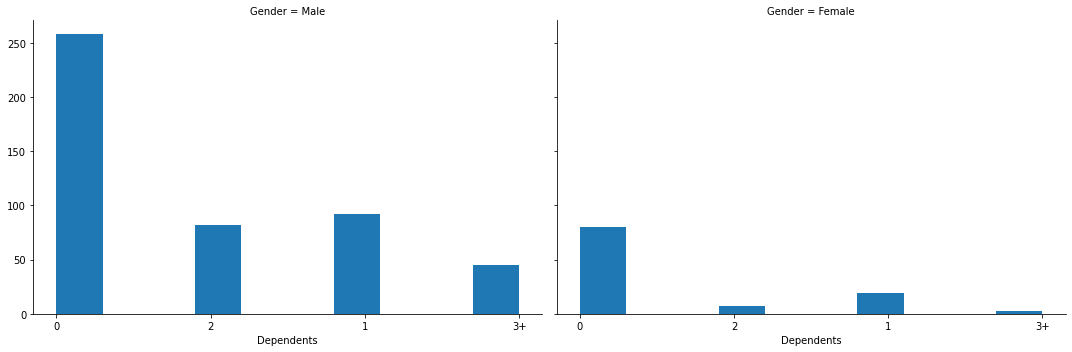

In [119]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'Dependents')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


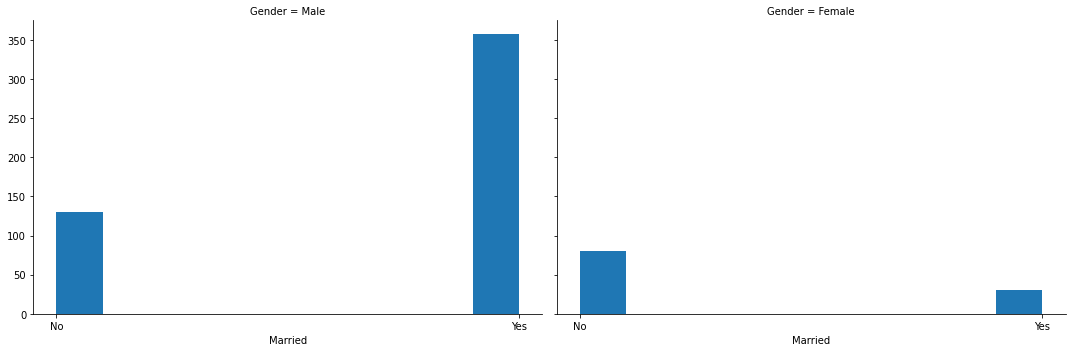

In [108]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'Married')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


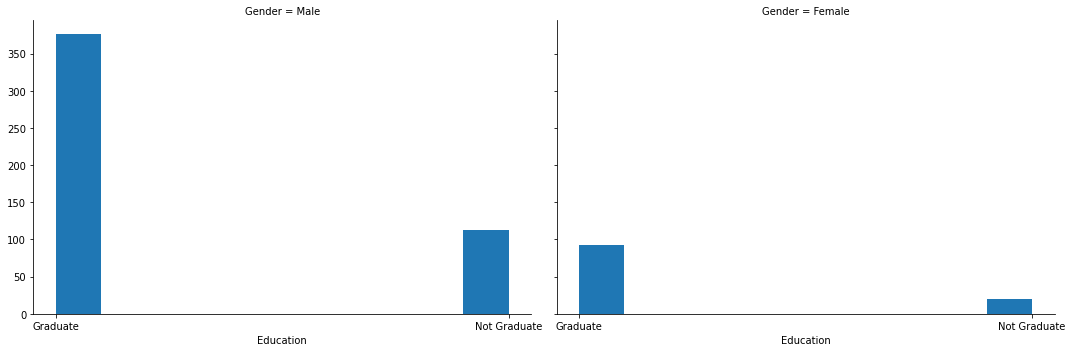

In [84]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'Education')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


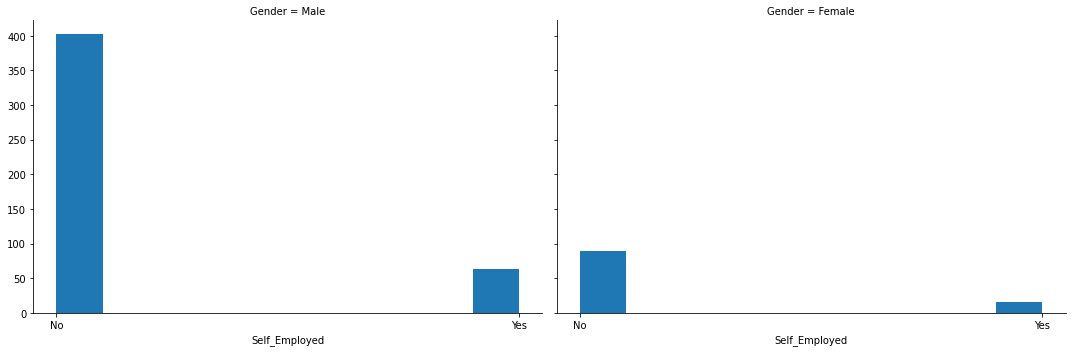

In [87]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'Self_Employed')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


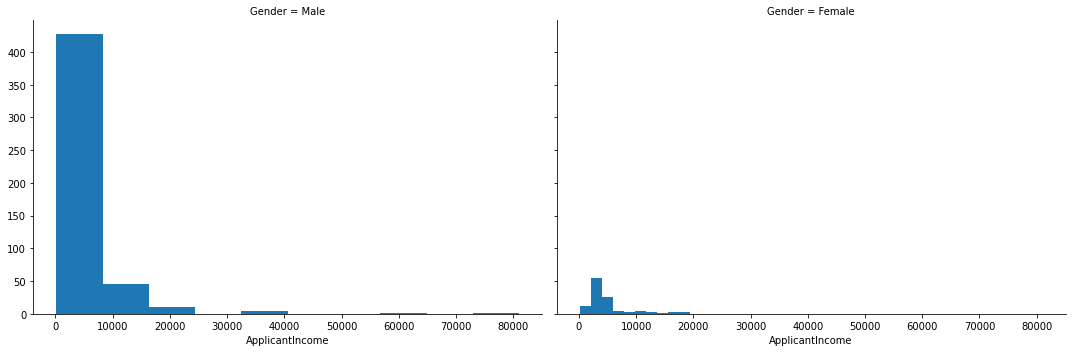

In [89]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'ApplicantIncome')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


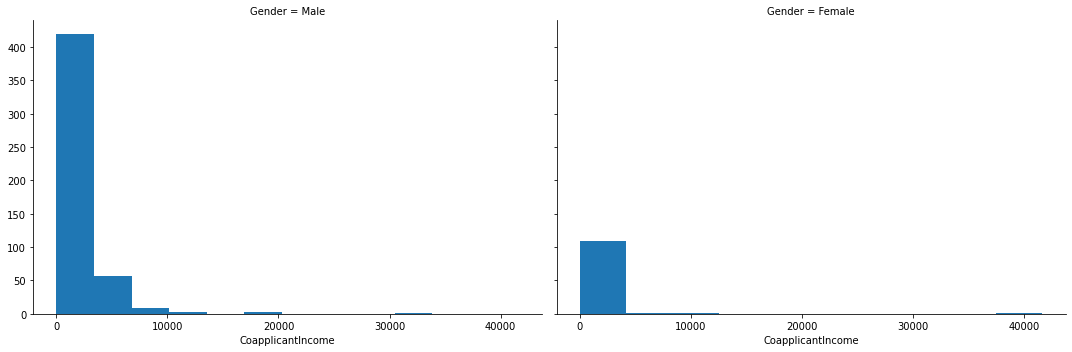

In [121]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'CoapplicantIncome')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


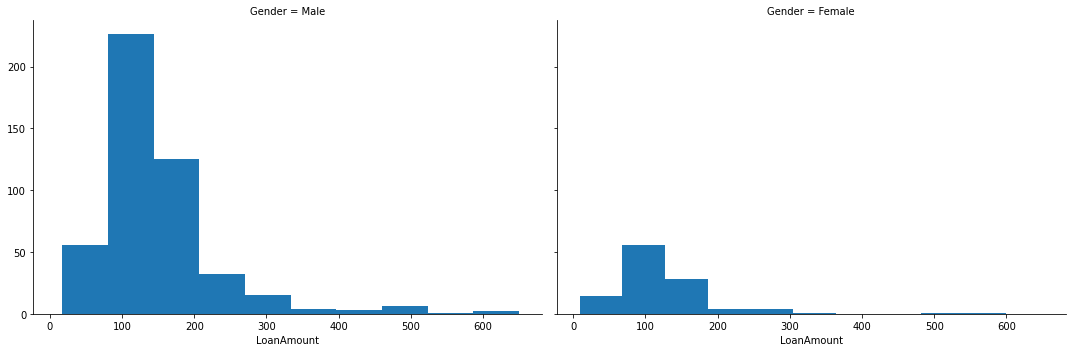

In [95]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'LoanAmount')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


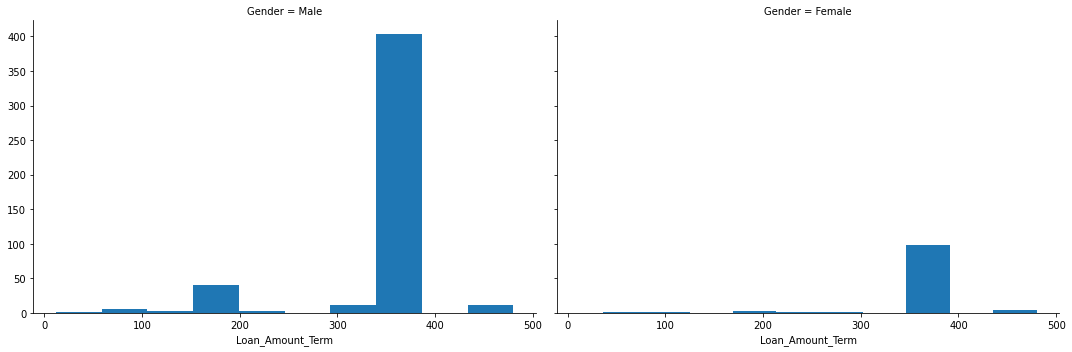

In [97]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'Loan_Amount_Term')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


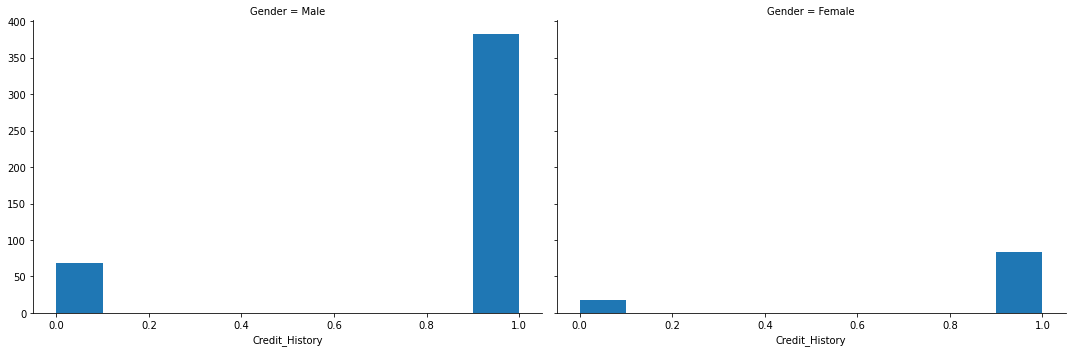

In [99]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'Credit_History')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


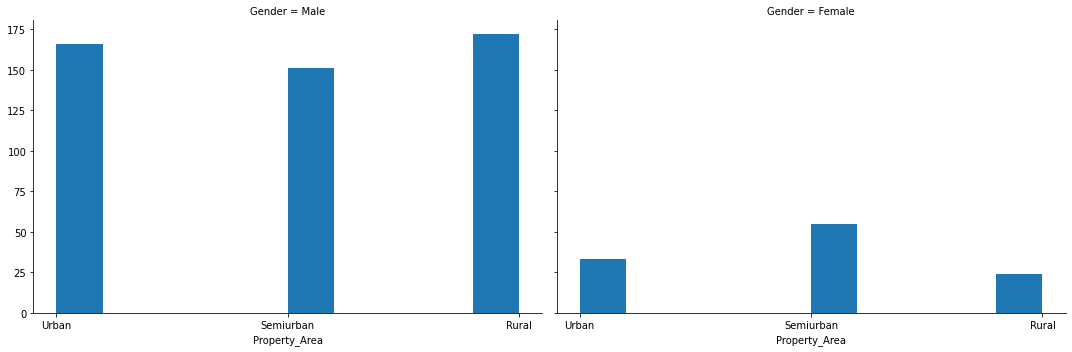

In [122]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'Property_Area')

**Observation**


1.   In all the plot above it is clear that Males are dominant in all the fields.
2.   Females have less Loan amount than Males



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


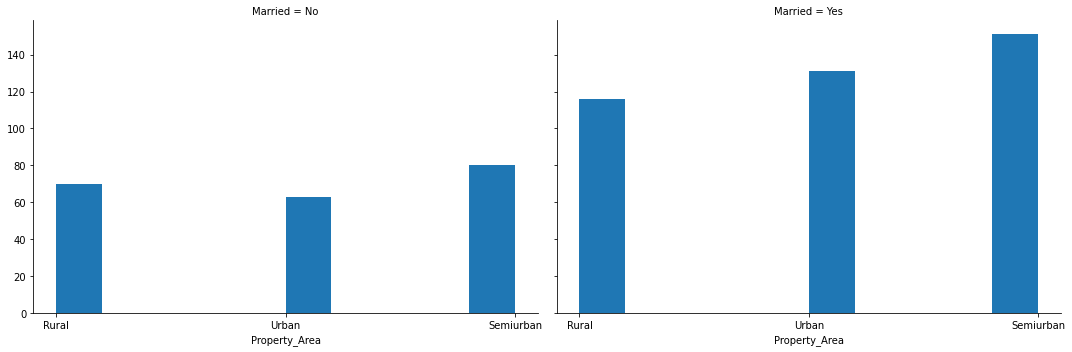

In [125]:
fg = sns.FacetGrid(df,col='Married',aspect=1.5, size=5)
fg.map(plt.hist, 'Property_Area')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


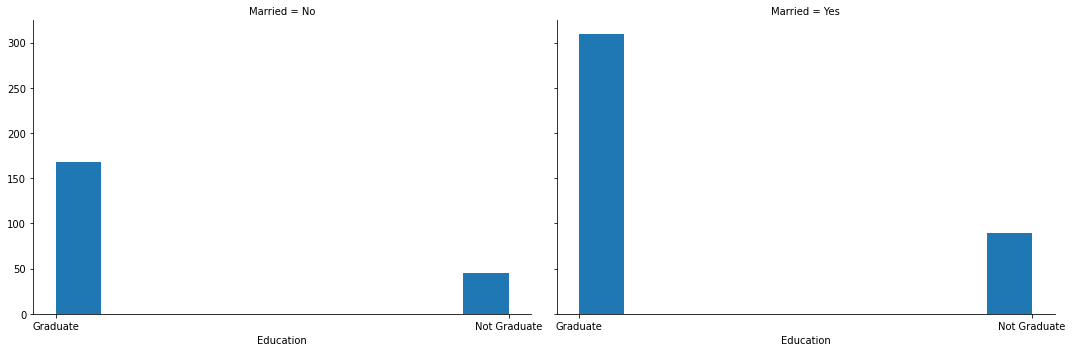

In [127]:
fg = sns.FacetGrid(df,col='Married',aspect=1.5, size=5)
fg.map(plt.hist, 'Education')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


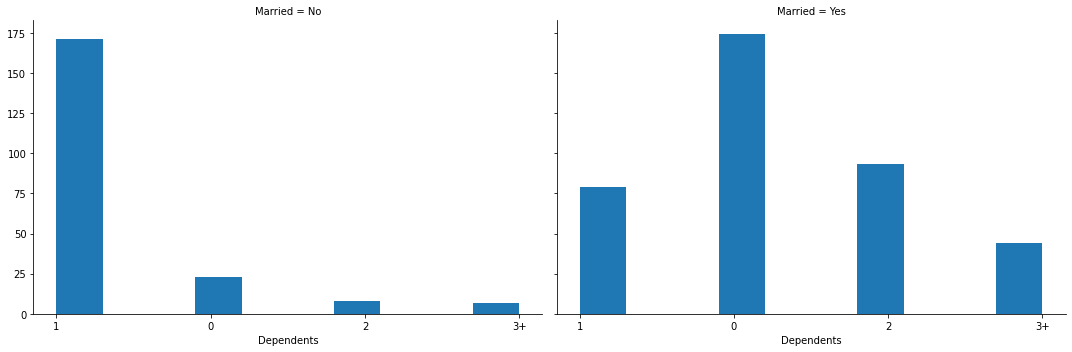

In [129]:
fg = sns.FacetGrid(df,col='Married',aspect=1.5, size=5)
fg.map(plt.hist, 'Dependents')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


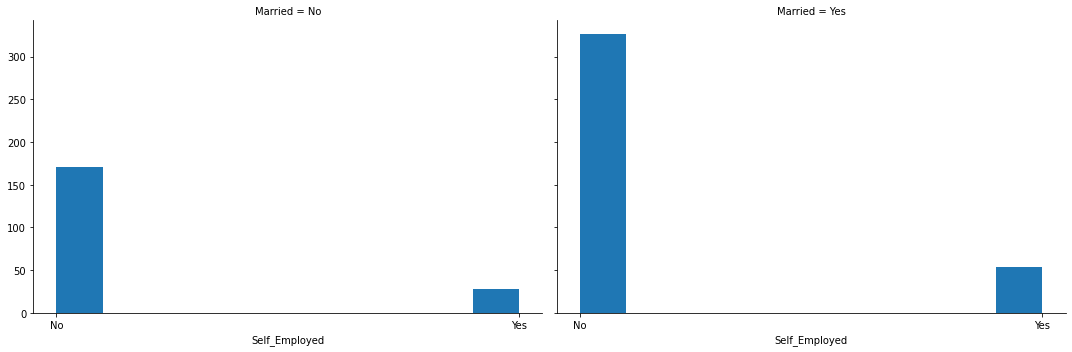

In [131]:
fg = sns.FacetGrid(df,col='Married',aspect=1.5, size=5)
fg.map(plt.hist, 'Self_Employed')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


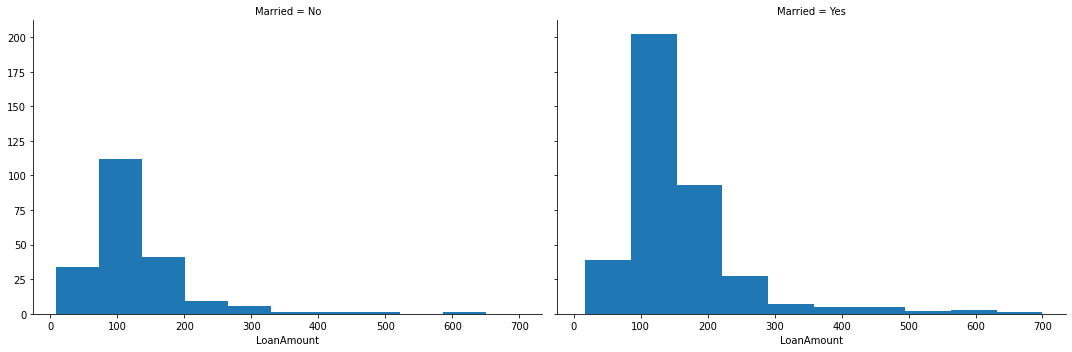

In [135]:
fg = sns.FacetGrid(df,col='Married',aspect=1.5, size=5)
fg.map(plt.hist, 'LoanAmount')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


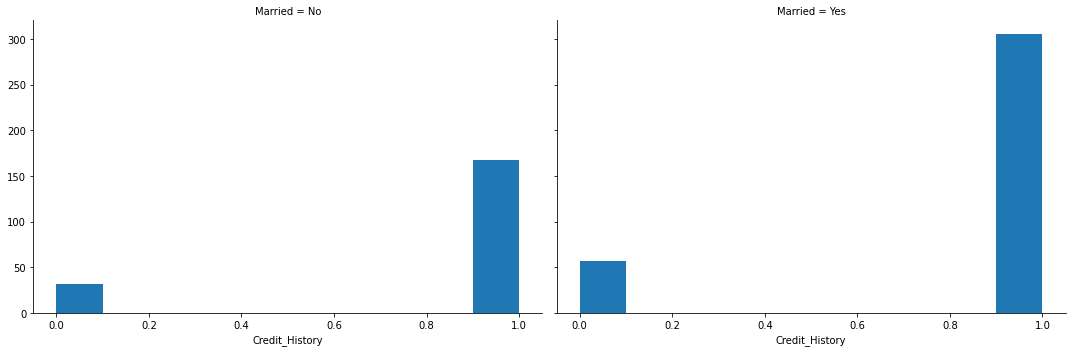

In [138]:
fg = sns.FacetGrid(df,col='Married',aspect=1.5, size=5)
fg.map(plt.hist, 'Credit_History')

**Observations**


1.   Married are more then Unmarried in the bank book
2.   Unmarried are more dependent than married



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


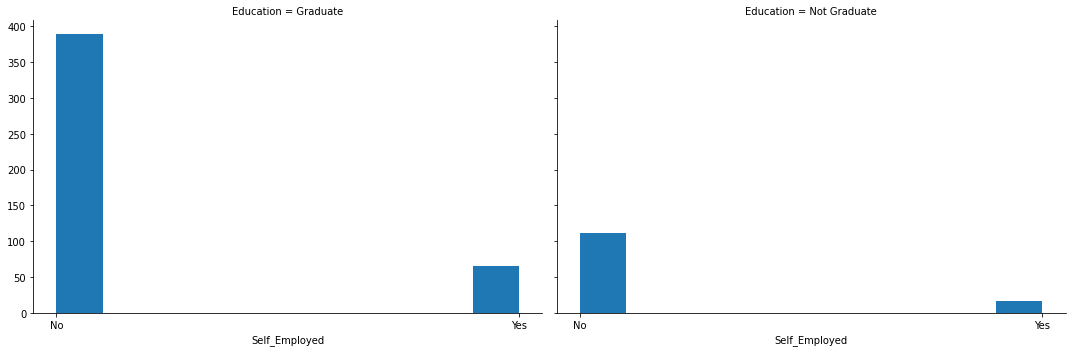

In [140]:
fg = sns.FacetGrid(df,col='Education',aspect=1.5, size=5)
fg.map(plt.hist, 'Self_Employed')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


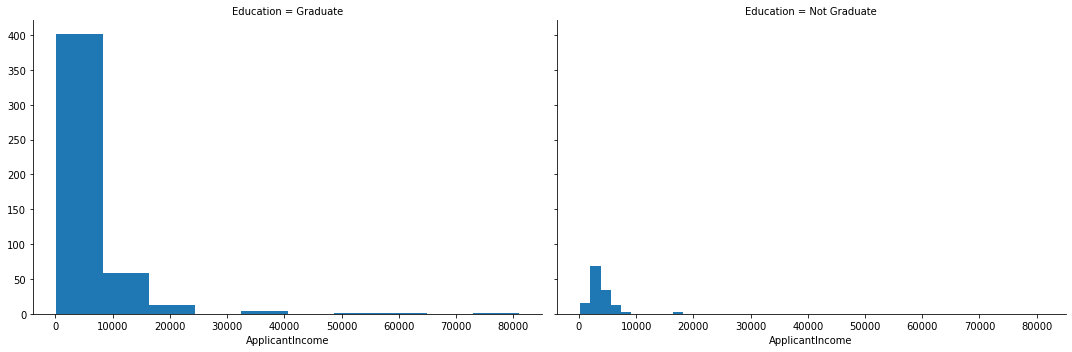

In [142]:
fg = sns.FacetGrid(df,col='Education',aspect=1.5, size=5)
fg.map(plt.hist, 'ApplicantIncome')

**Observations**


1.   Graduates are less self employed than un-graduates
2.   Borrower are more gradutes in bank book

**5. Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc**



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


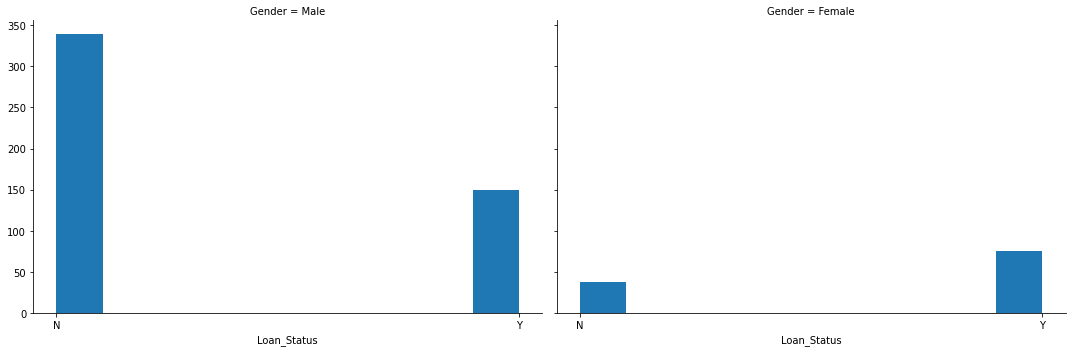

In [149]:
fg = sns.FacetGrid(df,col='Gender',aspect=1.5, size=5)
fg.map(plt.hist, 'Loan_Status')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


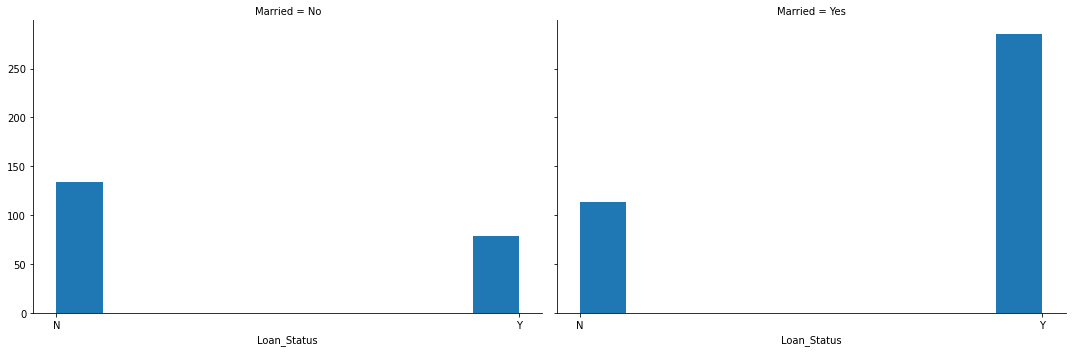

In [151]:
fg = sns.FacetGrid(df,col='Married',aspect=1.5, size=5)
fg.map(plt.hist, 'Loan_Status')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


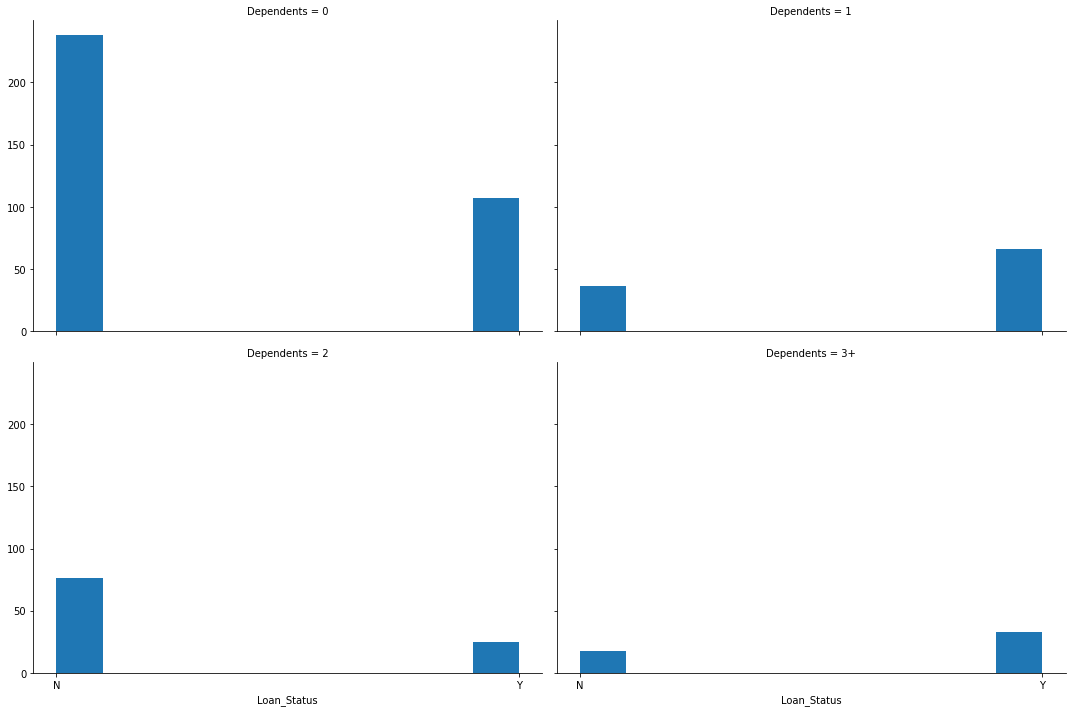

In [154]:
fg = sns.FacetGrid(df,col='Dependents',aspect=1.5, size=5, col_wrap=2)
fg.map(plt.hist, 'Loan_Status')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


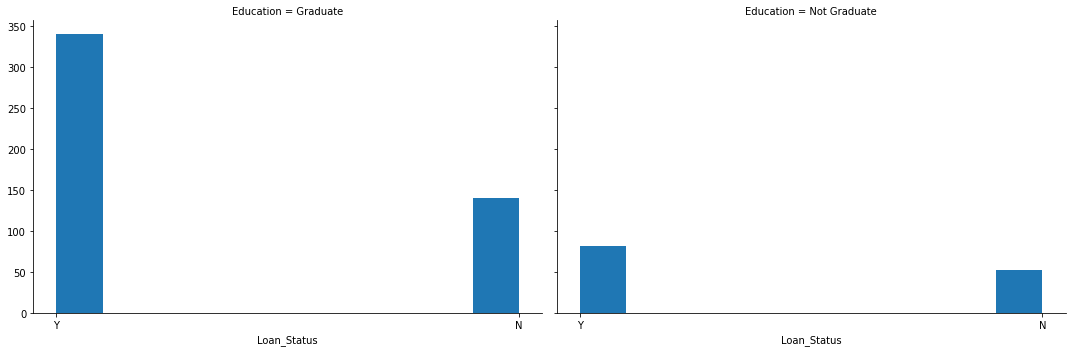

In [156]:
fg = sns.FacetGrid(df,col='Education',aspect=1.5, size=5)
fg.map(plt.hist, 'Loan_Status')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


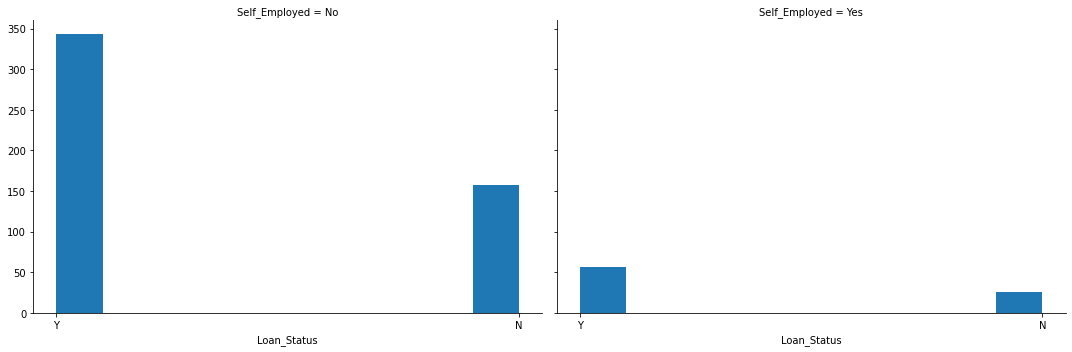

In [157]:
fg = sns.FacetGrid(df,col='Self_Employed',aspect=1.5, size=5)
fg.map(plt.hist, 'Loan_Status')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


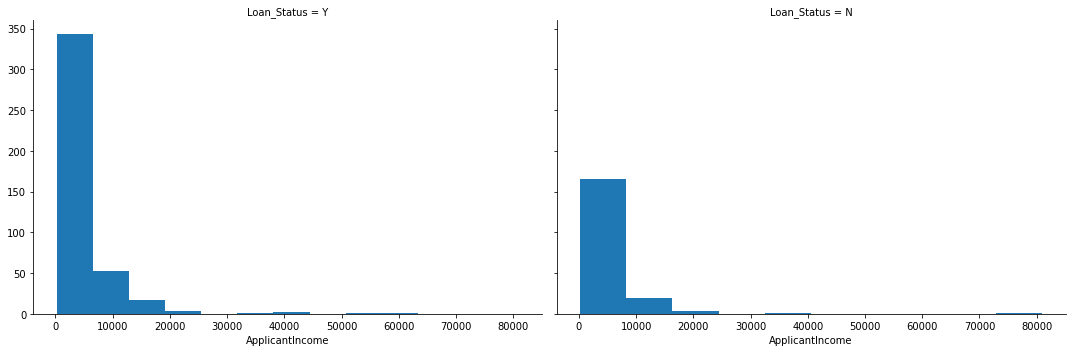

In [162]:
fg = sns.FacetGrid(df,col='Loan_Status', size=5, aspect=1.5)

fg.map(plt.hist, 'ApplicantIncome')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


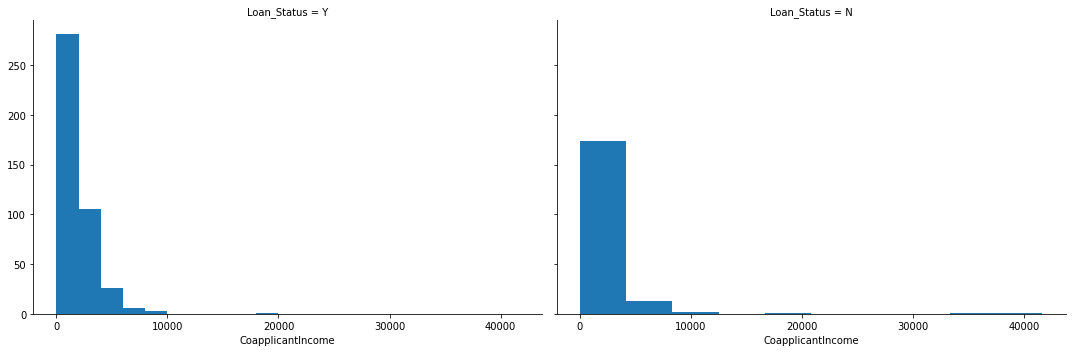

In [163]:
fg = sns.FacetGrid(df,col='Loan_Status', size=5, aspect=1.5)

fg.map(plt.hist, 'CoapplicantIncome')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


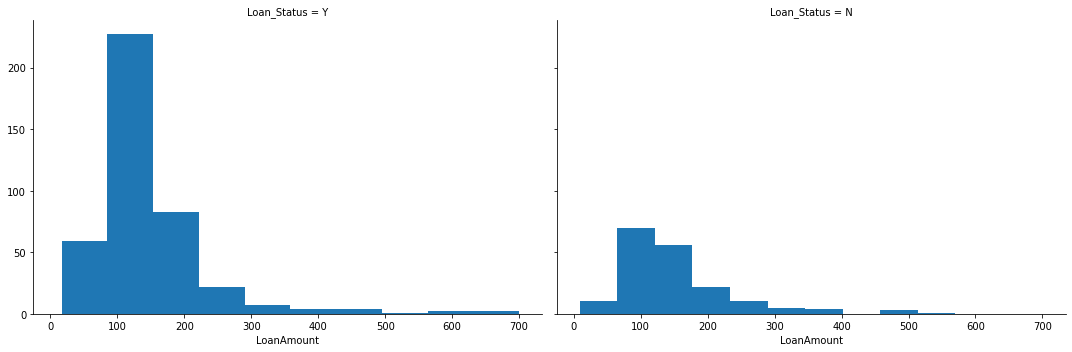

In [166]:
fg = sns.FacetGrid(df,col='Loan_Status', size=5, aspect=1.5)

fg.map(plt.hist, 'LoanAmount')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


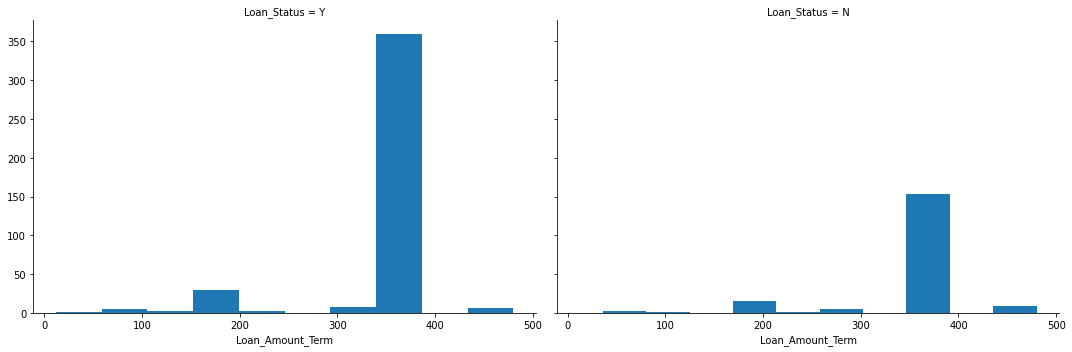

In [168]:
fg = sns.FacetGrid(df,col='Loan_Status', size=5, aspect=1.5)

fg.map(plt.hist, 'Loan_Amount_Term')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


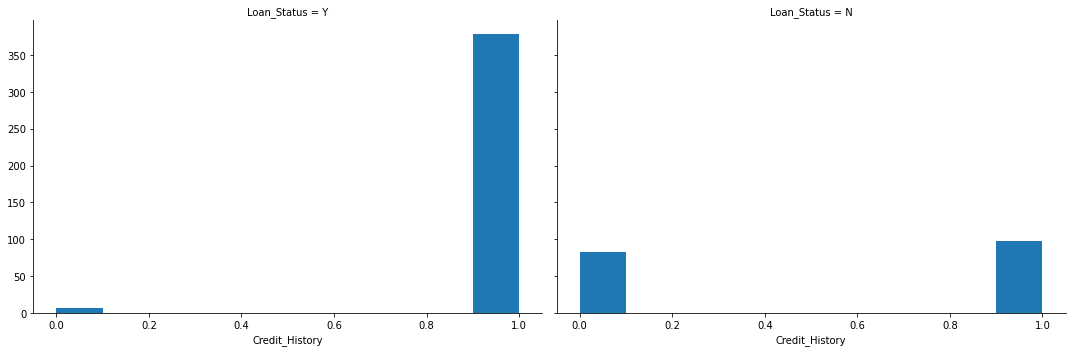

In [170]:
fg = sns.FacetGrid(df,col='Loan_Status', size=5, aspect=1.5)

fg.map(plt.hist, 'Credit_History')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


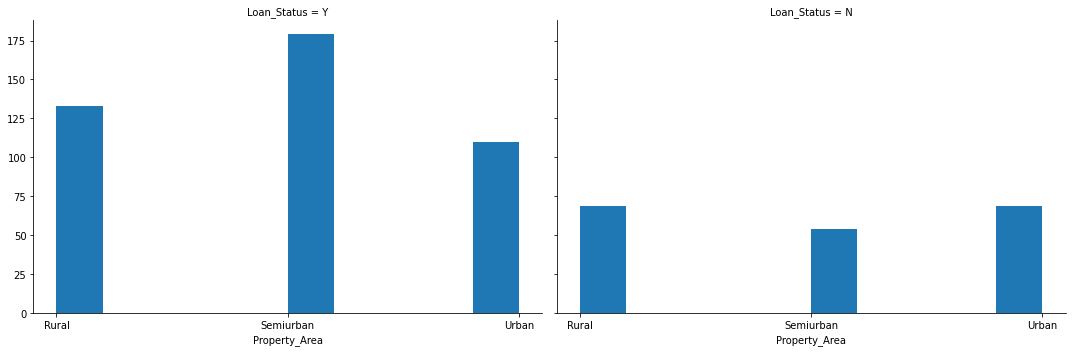

In [171]:
fg = sns.FacetGrid(df,col='Loan_Status', size=5, aspect=1.5)

fg.map(plt.hist, 'Property_Area')

**Observations**


1.   Males have more N value as well as more Y value as compared to female
2.   Married have more Yes status 
3.   Dependent 0 have more Y as well as N values
4.   Dependent 1 has lowest of all Y and N values
5.   Graduates have more loan
6.   Not self employed people have more loan
7.   Person have loan, has more Applicant Income same in case of CoapplicantIncome
8.   Loan Amount between 100-150 are more acccepted
9.   Loan Amount Term between 350-490 are more accepted
10.  Person having cresit history of 1 are getting loan more frequently
11.  SemiUrban Area are most Y value

**6. How is the class distribution (Y/N) in Label(Target) Variable ?**



In [190]:
df.groupby(['Loan_Status']).size()

Loan_Status
N    192
Y    422
dtype: int64

**7. Identify the Independent Variables that have missing values.**

In [315]:
for i in list(set(df.columns) - set(df['Loan_Status'])):
  print(i)
  if df[i].isnull().sum() > 0:
    con_null.append(i)

Loan_ID
ApplicantIncome
Loan_Amount_Term
Self_Employed
LoanAmount
Property_Area
Education
Gender
Dependents
CoapplicantIncome
Loan_Status
Credit_History
Married


**8. Handle missing values appropriately , explain the technique applied for each case**

In [319]:
print(con_null)
for i in con_null:
  df[i] = df[i].fillna(df[i].mode()[0])

['Loan_Amount_Term', 'Self_Employed', 'Gender', 'Credit_History', 'Married', 'LoanAmount']


**9. Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)**

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.5, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14cecfac18>]],
      dtype=object)

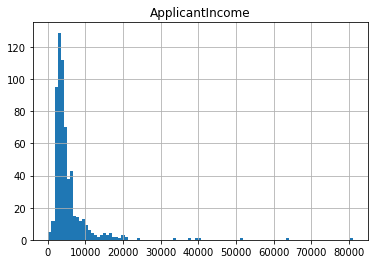

In [252]:
df.hist('ApplicantIncome', bins=100)

In [261]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14cef1eac8>]],
      dtype=object)

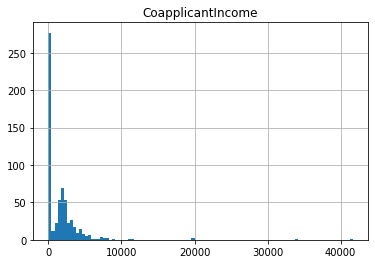

In [263]:
df.hist('CoapplicantIncome', bins=100)

In [264]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14ceccd710>]],
      dtype=object)

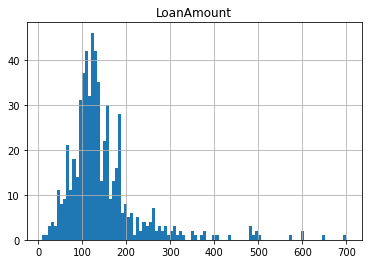

In [265]:
df.hist('LoanAmount', bins=100)

In [267]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

**10. Use Box-Plot chart to represent the Outliers for each Independent Variable**

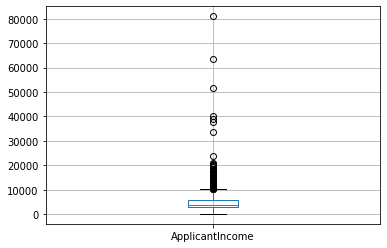

In [268]:
df.boxplot('ApplicantIncome')

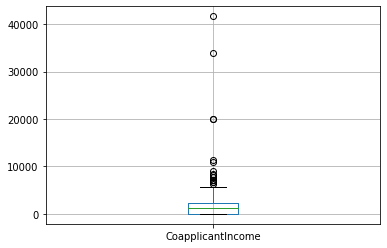

In [269]:
df.boxplot('CoapplicantIncome')

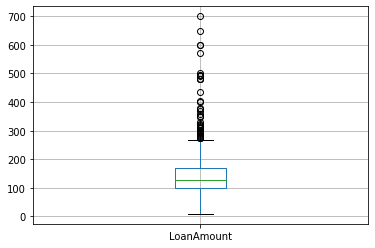

In [271]:
df.boxplot('LoanAmount')

**11. Perform treatment of these Outliers using appropriate techniqies.Explain your approach**

In [0]:
i=df[df['ApplicantIncome'] == int(df['ApplicantIncome'].describe()['max'])].index
df = df.drop(i)

In [0]:
i=df[df['CoapplicantIncome'] == int(df['CoapplicantIncome'].describe()['max'])].index
df = df.drop(i)

In [0]:
i=df[df['LoanAmount'] == int(df['LoanAmount'].describe()['max'])].index
df = df.drop(i)

####**Step-1**
 Perform Label Encoding on Target Variable (Loan_Status).

In [0]:
lE = LabelEncoder()
df_LE = df.copy()

In [321]:
df_LE['enc_Loan_Status'] = lE.fit_transform(df_LE['Loan_Status'])
df_LE = df_LE.drop(columns=['Loan_Status'])
cat_data

['Loan_Amount_Term',
 'Self_Employed',
 'Property_Area',
 'Education',
 'Gender',
 'Dependents',
 'Credit_History',
 'Married']

####**Step-2**

1.   Perform Label Encoding on Categorical Independent Variables.
2.   What is the shape of dataframe post Categorical Encoding ?
3.   Carry out Correlation analysis on this dataframe. Plot using HeatMap
4.   Identify the variables that have strong correlation using Label Encoding   (    Correlation Coefficient > 0.5 or <0.5)

In [340]:
#1
for i in cat_data:
  if (str(i) == 'Loan_Amount_Term' or i == 'Credit_History'):
    continue
  df_LE['enc_' + i] = lE.fit_transform(df_LE[i])
df_LE = df_LE.drop(columns=cat_data)
df_LE

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Loan_Status,enc_Self_Employed,enc_Property_Area,enc_Education,enc_Gender,enc_Dependents,enc_Married
0,LP001002,5849,0.000000,120.0,1,0,2,0,1,0,0
1,LP001003,4583,1508.000000,128.0,0,0,0,0,1,1,1
2,LP001005,3000,0.000000,66.0,1,1,2,0,1,0,1
3,LP001006,2583,2358.000000,120.0,1,0,2,1,1,0,1
4,LP001008,6000,0.000000,141.0,1,0,2,0,1,0,0
5,LP001011,5417,4196.000000,267.0,1,1,2,0,1,2,1
6,LP001013,2333,1516.000000,95.0,1,0,2,1,1,0,1
7,LP001014,3036,2504.000000,158.0,0,0,1,0,1,3,1
8,LP001018,4006,1526.000000,168.0,1,0,2,0,1,2,1
9,LP001020,12841,10968.000000,349.0,0,0,1,0,1,1,1


In [324]:
#2
df_LE.shape

(611, 19)

In [328]:
#3
corR = df_LE.corr()
corR.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,enc_Loan_Status,enc_Self_Employed,enc_Property_Area,enc_Education,enc_Gender,enc_Dependents,enc_Married
ApplicantIncome,1.000000,-0.120263,0.563370,-0.058565,0.032199,0.018613,0.172530,0.004386,-0.153650,0.050501,0.060182,0.032424
CoapplicantIncome,-0.120263,1.000000,0.180641,-0.004057,0.000220,-0.032284,-0.009628,-0.020366,-0.061790,0.158028,-0.019015,0.129882
LoanAmount,0.563370,0.180641,1.000000,0.056097,0.004046,-0.028386,0.128464,-0.063137,-0.167365,0.113538,0.128162,0.148055
Loan_Amount_Term,-0.058565,-0.004057,0.056097,1.000000,-0.001519,-0.027538,-0.035823,-0.069847,-0.076928,-0.083242,-0.094920,-0.106948
Credit_History,0.032199,0.000220,0.004046,-0.001519,1.000000,0.540107,-0.002596,-0.004932,-0.075482,0.012248,-0.034892,0.014360


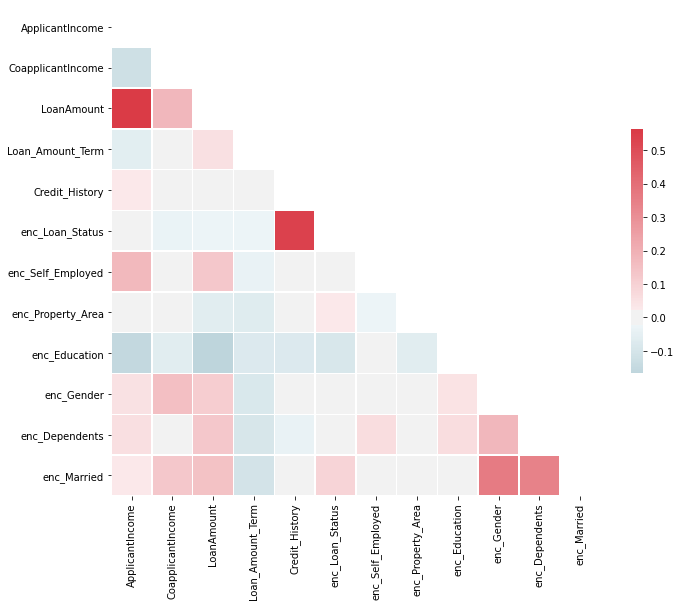

In [332]:
mask = np.zeros_like(corR, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

svm = sns.heatmap(corR, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Strong Correlation**


1.   ApplicantIncome, LoanAmount 
2.   Credit_history, Loan_Status
3.   LoanAmount, Education
4.   ApplicantIncome, Education
5.   Dependents, Married
6.   Gender, Married


**Step 3 - Using dataframe from Step 1:**

1.   Perform One Hot Encoding on Categorical Independent Variables.
2. What is the shape of dataframe post OHE Encoding ?
3. Carry out Correlation analysis on this dataframe. Plot using HeatMap
4. Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)



In [0]:
df_OHE = df.copy()
oHE = OneHotEncoder()

df_OHE['enc_Loan_Status'] = lE.fit_transform(df_OHE['Loan_Status'])
df_OHE = df_OHE.drop(columns=['Loan_Status'])

In [353]:
for i in cat_data:
  if (str(i) == 'Loan_Amount_Term' or i == 'Credit_History'):
    continue
  enc_rel = pd.DataFrame(oHE.fit_transform(df_OHE[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(str(i)+'_')
  df_OHE = df_OHE.join(enc_rel)
df_OHE = df_OHE.drop(columns=cat_data)
df_OHE


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Loan_Status,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2,Education_0,Education_1,Gender_0,Gender_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Married_0,Married_1
0,LP001002,5849,0.000000,120.0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,LP001003,4583,1508.000000,128.0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,LP001005,3000,0.000000,66.0,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,LP001006,2583,2358.000000,120.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,LP001008,6000,0.000000,141.0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,LP001011,5417,4196.000000,267.0,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,LP001013,2333,1516.000000,95.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,LP001014,3036,2504.000000,158.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8,LP001018,4006,1526.000000,168.0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,LP001020,12841,10968.000000,349.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [355]:
df_OHE.shape

(611, 20)

In [356]:
oheCorR = df_OHE.corr()
oheCorR

,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Loan_Status,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2,Education_0,Education_1,Gender_0,Gender_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Married_0,Married_1
ApplicantIncome,1.000000,-0.120263,0.563370,0.018613,-0.141494,0.141494,0.032021,-0.032545,0.002771,0.016451,-0.016451,-0.008783,0.008783,-0.095253,0.122409,-0.054080,0.079598,-0.040196,0.040196
CoapplicantIncome,-0.120263,1.000000,0.180641,-0.032284,0.025294,-0.025294,0.001499,0.057345,-0.060865,0.024822,-0.024822,-0.011318,0.011318,-0.030093,0.014219,0.024698,0.001129,-0.062326,0.062326
LoanAmount,0.563370,0.180641,1.000000,-0.028386,-0.096776,0.096776,0.008044,-0.005681,-0.001888,-0.001380,0.001380,0.005293,-0.005293,-0.037115,0.002011,-0.012451,0.082919,-0.011513,0.011513
enc_Loan_Status,0.018613,-0.032284,-0.028386,1.000000,-0.067518,0.067518,-0.025775,0.068921,-0.046498,0.040025,-0.040025,-0.050547,0.050547,0.045398,-0.050335,-0.005763,-0.005187,0.019338,-0.019338
Self_Employed_0,-0.141494,0.025294,-0.096776,-0.067518,1.000000,-1.000000,-0.024028,-0.005701,0.029131,-0.010919,0.010919,-0.000369,0.000369,0.090840,-0.080455,-0.030768,-0.011921,0.004625,-0.004625
Self_Employed_1,0.141494,-0.025294,0.096776,0.067518,-1.000000,1.000000,0.024028,0.005701,-0.029131,0.010919,-0.010919,0.000369,-0.000369,-0.090840,0.080455,0.030768,0.011921,-0.004625,0.004625
Property_Area_0,0.032021,0.001499,0.008044,-0.025775,-0.024028,0.024028,1.000000,-0.503126,-0.445225,-0.074568,0.074568,-0.076338,0.076338,0.046938,-0.082754,-0.002308,0.032519,0.007017,-0.007017
Property_Area_1,-0.032545,0.057345,-0.005681,0.068921,-0.005701,0.005701,-0.503126,1.000000,-0.549828,0.040662,-0.040662,0.109135,-0.109135,-0.008210,0.008250,-0.015503,0.025189,-0.006113,0.006113
Property_Area_2,0.002771,-0.060865,-0.001888,-0.046498,0.029131,-0.029131,-0.445225,-0.549828,1.000000,0.029941,-0.029941,-0.039294,0.039294,-0.036860,0.071436,0.018294,-0.057528,-0.000448,0.000448
Education_0,0.016451,0.024822,-0.001380,0.040025,-0.010919,0.010919,-0.074568,0.040662,0.029941,1.000000,-1.000000,0.044092,-0.044092,0.034870,0.013975,-0.020377,-0.055398,0.009664,-0.009664


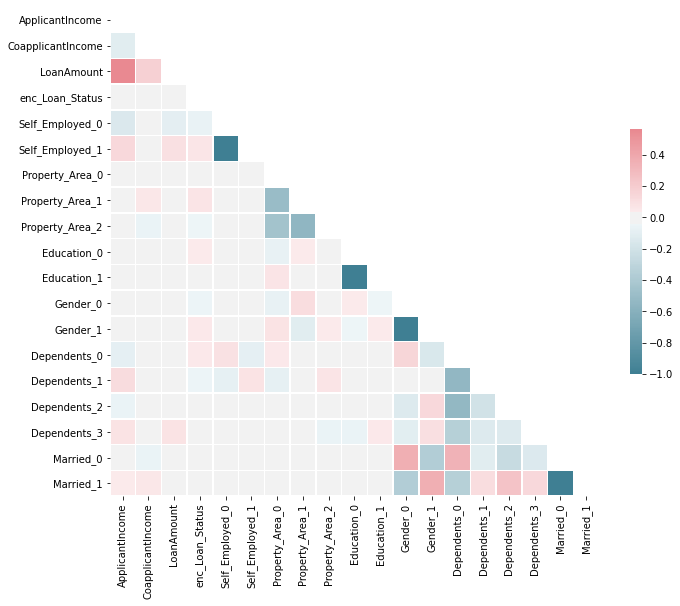

In [357]:
mask = np.zeros_like(oheCorR, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

svm = sns.heatmap(oheCorR, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Strong Relations**


1.   Married_0, Married_1
2.   Gender_0, Gender_1
3.   Education_0, Education_1
4.   Self_Employed_0, Self_Employed_1
5.   LoanAmount, ApplicantIncome
6.   Gender_0, Married_1
7.   Gender_1, Married_1
8.   Gender_0, Married_0
9.   Gender_1, Married_0
10.  Property_Area_1, Property_Area_2

